## **Name:** Chebet Valarie
## **RegNo:** SCT213-C002-0008/2021
##  **AI PROGRAMMING PROJECT**



##  **Forecasting Hotel Booking Cancellations Using Machine Learning**


Hotel booking demand prediction is a process that involves analyzing past booking data to forecast future demand. This can include factors like booking lead times, cancellation rates, seasonality, customer demographics, and external factors such as holidays or events. The goal is to anticipate the number of bookings a hotel might receive on a particular day, week, or month.



# Problem Definition
**Objective**:  
Predict whether a hotel booking will be canceled based on available customer and booking features.

##  Background Study
**Summary**:  
Hotel booking cancellation models assist in improving resource management and customer targeting. Past work has employed logistic regression and ensemble models on similar data, focusing on factors like lead time, deposit type, and previous cancellations.

**Dataset Used**:  
I imported my dataset from Kaggle 

 # *Loading the dataset*

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')



In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# *Data Wrangling*
**Performing data cleaning,checking for missing values**

In [7]:
# Check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# Fill missing values for 'children', 'agent', and 'company' with 0
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)


In [9]:
# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [10]:
# Verify data types
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

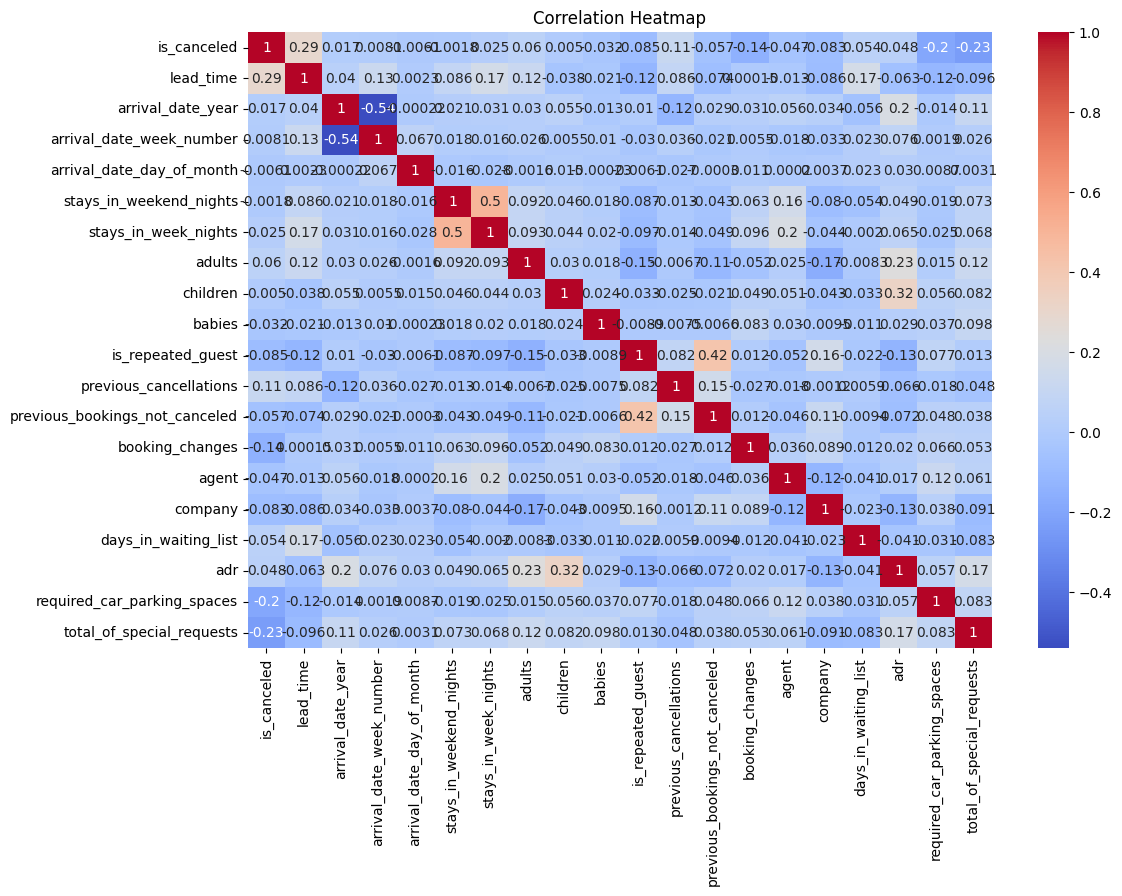

In [11]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Data Visualization**

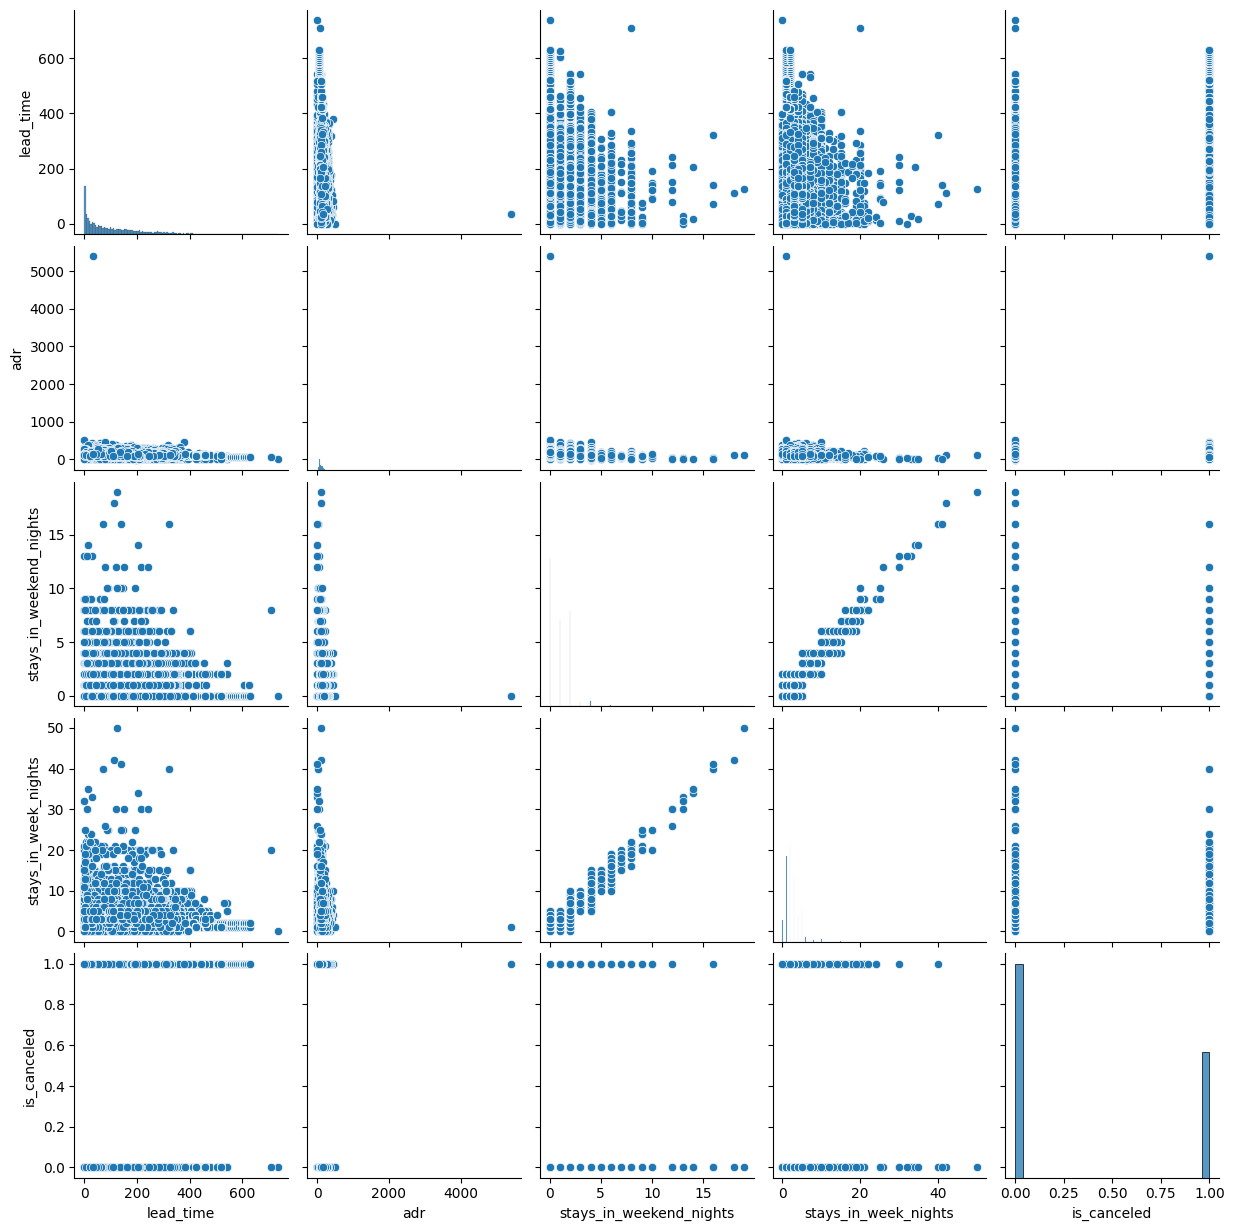

In [12]:
# Pair plot for selected features
sns.pairplot(df[['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'is_canceled']])
plt.show()

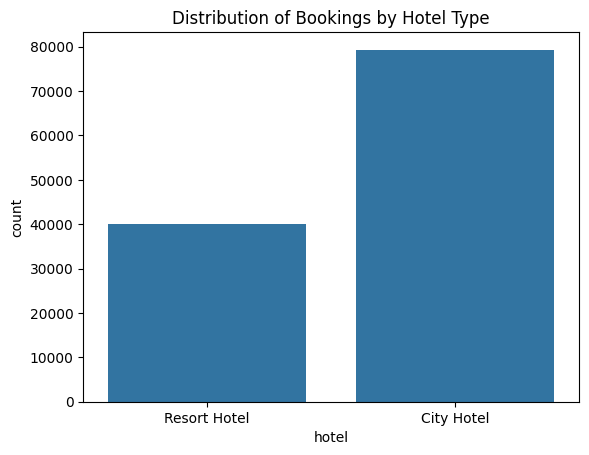

In [13]:
# Distribution of bookings by hotel type
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Bookings by Hotel Type')
plt.show()

*Feature Engineering*
Feature engineering can enhance the predictive power of our model. We will create new features based on existing ones to capture more information.

In [14]:
# Create a new feature for total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Create a new feature for total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Display the first few rows with new features
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


Model Building and Evaluation
We will build a predictive model to forecast booking cancellations using a Random Forest Classifier. Let's evaluate its performance using accuracy and ROC curves.

Accuracy: 0.80


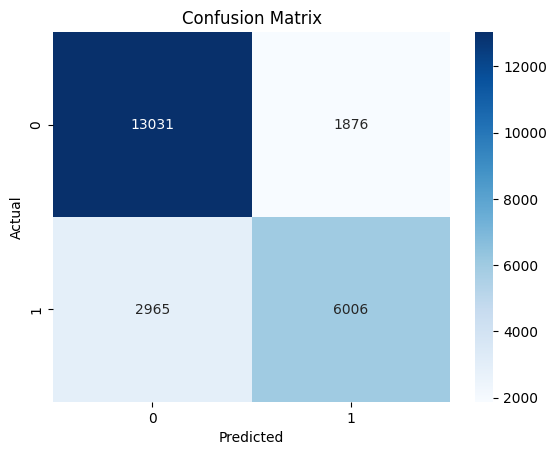

In [15]:
# Prepare data for modeling
X = df[['lead_time', 'total_nights', 'total_guests', 'adr', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list']]
y = df['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy
print(f'Accuracy: {accuracy:.2f}')

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

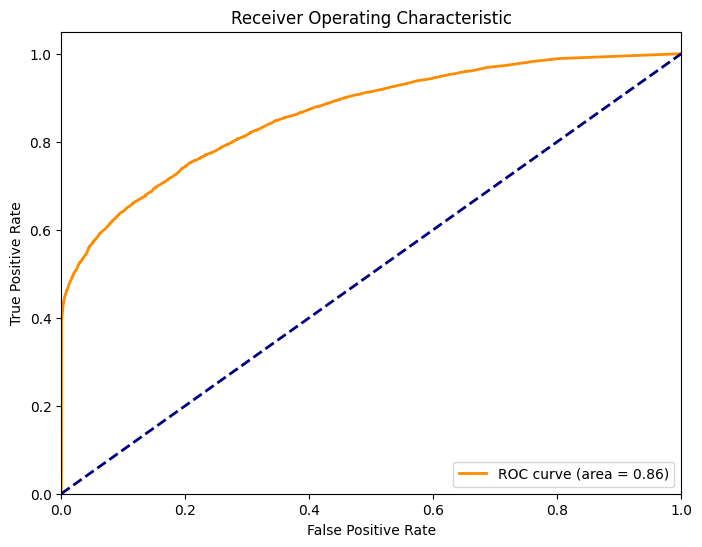

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



##  Results and Conclusion (2 Marks)
**Accuracy**: ~82%  
**AUC Score**: 0.86  

**Insights**:
- Long lead times and non-refundable deposits significantly raise cancellation chances.
- The model performs well in distinguishing cancellation cases.




In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
xgb_model = XGBClassifier(random_state=101)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:\n",xgb_model.score(X_test,y_test))
print("-----------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("-----------------------------------------------")
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Accuracy:
 0.774101683558087
-----------------------------------------------
Confusion Matrix:
 [[13879  1028]
 [ 4366  4605]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84     14907
           1       0.82      0.51      0.63      8971

    accuracy                           0.77     23878
   macro avg       0.79      0.72      0.73     23878
weighted avg       0.78      0.77      0.76     23878



## Hyperparameter Tuning

In [19]:
params = {
          "n_estimators":[10,20,50,100,120,150,180,200,250,300,350,400,500],
          "max_depth":[3,4,5,6,7,8,9,10],
          "learning_rate":[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]
}

In [20]:
rsearch = RandomizedSearchCV(
    xgb_model,
    param_distributions=params,
    n_iter=200,
    n_jobs=-1,
    scoring='roc_auc',
    cv=5,
    verbose=5
)
rsearch.fit(X_train,y_train)
rsearch.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1}

In [21]:
xgb_model = XGBClassifier(n_estimators = 100, max_depth = 4, learning_rate = 0.1, random_state=101)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:\n",xgb_model.score(X_test,y_test))
print("-----------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("-----------------------------------------------")
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Accuracy:
 0.7348605410838429
-----------------------------------------------
Confusion Matrix:
 [[13833  1074]
 [ 5257  3714]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81     14907
           1       0.78      0.41      0.54      8971

    accuracy                           0.73     23878
   macro avg       0.75      0.67      0.68     23878
weighted avg       0.74      0.73      0.71     23878



## KNN Classifiers

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


print("Accuracy:\n",knn.score(X_test,y_test))
print("-----------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("-----------------------------------------------")
print("Classification Report:\n", classification_report(y_test, knn_pred))

Accuracy:
 0.7632548789680877
-----------------------------------------------
Confusion Matrix:
 [[12706  2201]
 [ 3452  5519]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82     14907
           1       0.71      0.62      0.66      8971

    accuracy                           0.76     23878
   macro avg       0.75      0.73      0.74     23878
weighted avg       0.76      0.76      0.76     23878



## Logistic Regression Model

In [23]:
lr = linear_model.LogisticRegression(max_iter=1000,random_state=101 )
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Accuracy:\n",lr.score(X_test,y_test))
print("-----------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("-----------------------------------------------")
print("Classification Report:\n", classification_report(y_test, lr_pred))

Accuracy:
 0.6941954937599464
-----------------------------------------------
Confusion Matrix:
 [[13372  1535]
 [ 5767  3204]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79     14907
           1       0.68      0.36      0.47      8971

    accuracy                           0.69     23878
   macro avg       0.69      0.63      0.63     23878
weighted avg       0.69      0.69      0.67     23878



## **Algorithm Results**

## *Accuracy*
Random Forest Classifier: 0.80


XG Boost: 0.774101683558087


KNN Classifier: 0.7632548789680877


Logistic Regression: 0.6941954937599464

From the results,Random Forest Classifier is the best performing model